In [1]:
import numpy as np
import os
import random
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from utils import *

2023-07-04 20:45:55.600517: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 20:45:56.952069: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.environ["PYTHONHASHSEED"] = "0"
random.seed(1234)
np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
x = []
y = []

f = open("12_06_2023_14_27_16.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(0)

f.close()

f = open("12_06_2023_14_30_18.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(1)

f.close()

f = open("12_06_2023_15_14_35.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(2)

f.close()

x = np.array(x)
#x = x[:,:,0:2]
y = np.array(y)

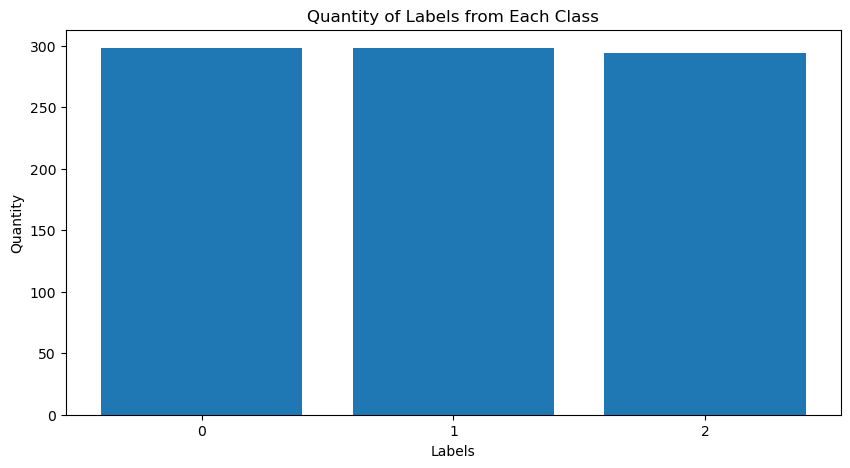

[0 1 2]
3


In [4]:
draw_bar_chart(y)

print(np.unique(y))

n_classes = len(np.unique(y))

print(n_classes)

In [5]:
# shuffle
x, y = shuffle(x, y, random_state=0)

# split
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=1/5, random_state=0, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=1/4, random_state=0, stratify=y_temp)

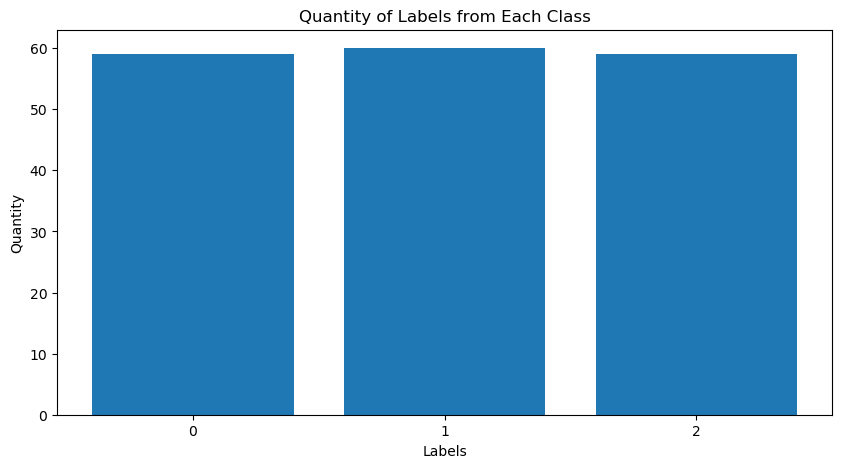

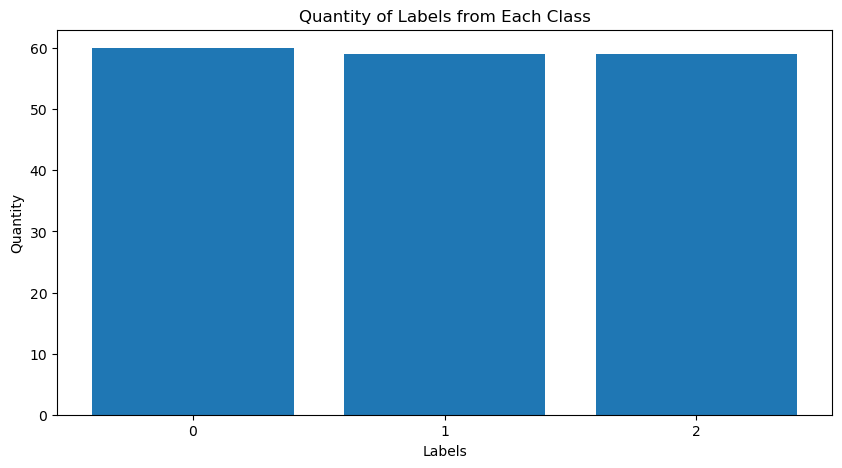

In [6]:
draw_bar_chart(y_val)
draw_bar_chart(y_test)

In [7]:
def create_model(input_shape, dropout=0.2):
   # Create a `Sequential` model and add a Dense layer as the first layer.
   model = tf.keras.models.Sequential()
   model.add(tf.keras.Input(shape=input_shape))
   model.add(tf.keras.layers.Conv1D(32, 2, activation='relu'))
   model.add(tf.keras.layers.MaxPooling1D(2,1))
   model.add(tf.keras.layers.Flatten())
   model.add(tf.keras.layers.Dropout(dropout))
   model.add(tf.keras.layers.Dense(16, activation='relu'))
   model.add(tf.keras.layers.Dense(n_classes, activation="softmax"))

   model.compile(
      loss="sparse_categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=1e-4),
      metrics=["sparse_categorical_accuracy"]
   )
   
   return model

In [8]:
input_shape = x.shape[1:]

model = create_model(input_shape)

model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=10000,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_val, y_val, verbose=1)

model.evaluate(x_test, y_test, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 32)            224       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 608)               0         
                                                                 
 dropout (Dropout)           (None, 608)               0         
                                                                 
 dense (Dense)               (None, 16)                9744      
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                        

2023-07-04 20:46:00.655819: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-04 20:46:00.697562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-04 20:46:00.697926: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/10000


2023-07-04 20:46:03.200199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-07-04 20:46:03.995471: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f47f4002dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-04 20:46:03.995506: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-07-04 20:46:04.002044: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-04 20:46:04.180166: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34/34 [==============================] - 4s 18ms/step - loss: 1.0880 - sparse_categorical_accuracy: 0.3858 - val_loss: 1.0636 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/10000
34/34 [==============================] - 0s 7ms/step - loss: 1.0615 - sparse_categorical_accuracy: 0.4307 - val_loss: 1.0343 - val_sparse_categorical_accuracy: 0.5169
Epoch 3/10000
34/34 [==============================] - 0s 7ms/step - loss: 1.0343 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.0086 - val_sparse_categorical_accuracy: 0.5225
Epoch 4/10000
34/34 [==============================] - 0s 6ms/step - loss: 1.0248 - sparse_categorical_accuracy: 0.4813 - val_loss: 0.9778 - val_sparse_categorical_accuracy: 0.5225
Epoch 5/10000
34/34 [==============================] - 0s 6ms/step - loss: 0.9957 - sparse_categorical_accuracy: 0.5187 - val_loss: 0.9468 - val_sparse_categorical_accuracy: 0.6461
Epoch 6/10000
34/34 [==============================] - 0s 6ms/step - loss: 0.9669 - sparse_categorical_accur

[0.15999624133110046, 0.9550561904907227]

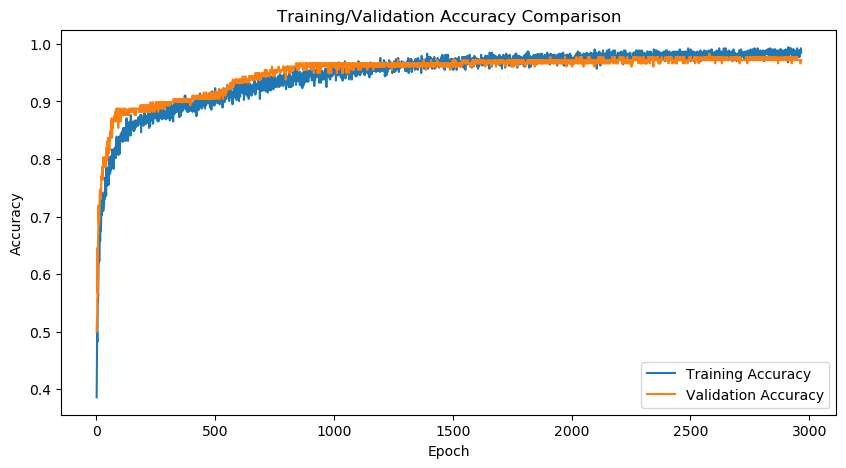

In [9]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

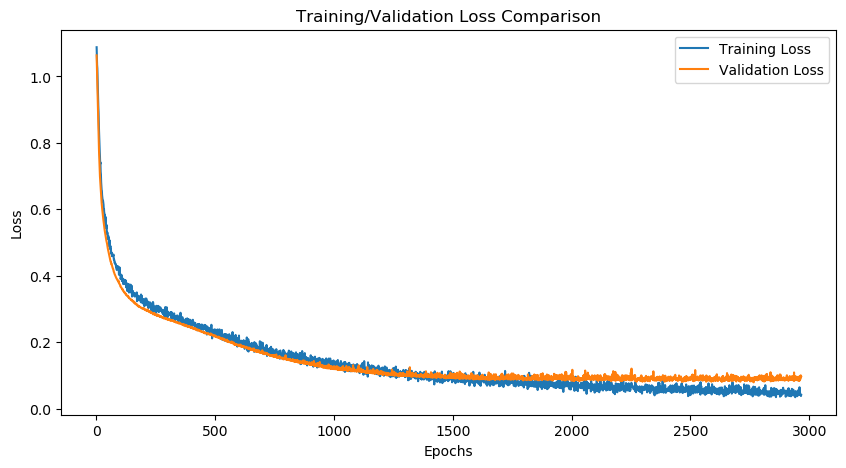

In [10]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9667    1.0000    0.9831        58
           1     1.0000    0.8939    0.9440        66
           2     0.8983    0.9815    0.9381        54

    accuracy                         0.9551       178
   macro avg     0.9550    0.9585    0.9550       178
weighted avg     0.9583    0.9551    0.9549       178



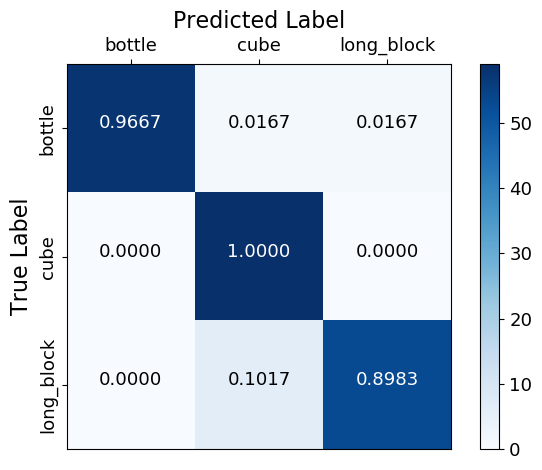

In [11]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_pred,y_test, digits=4))
plot_confusion_matrix(y_test, y_pred, ["bottle", "cube", "long_block"], save_path="cnn_dataset1_conf_matrix.svg")

In [12]:
# from sklearn.metrics import confusion_matrix

# plt.rcParams['svg.fonttype'] = 'none'

# target_names = ["bottle", "cube", "long block"]

# cm = confusion_matrix(y_test, y_pred)

# fig = plt.figure()
# plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))

# cbar = plt.colorbar()
# cbar.ax.tick_params(labelsize=13)

# ax = fig.gca()

# ax.tick_params(bottom=False, top=True, left=True, right=False)
# ax.tick_params(labelbottom=False, labeltop=True, labelleft=True, labelright=False)

# if target_names is not None:
#     tick_marks = np.arange(len(target_names))
#     plt.xticks(tick_marks, target_names, fontsize=13)
#     plt.yticks(tick_marks, target_names, fontsize=13, rotation="vertical", va="center")

# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# thresh = cm.max() / 1.5
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, "{:0.4f}".format(cm[i, j]),
#                 horizontalalignment="center",
#                 color="white" if cm[i, j] > thresh else "black", fontsize=13)

# plt.ylabel('True Label', fontsize=16)
# plt.title('Predicted Label', fontsize=16)


# plt.tight_layout()
# plt.savefig("confusion_matrix.svg", format="svg")

In [13]:
# dropouts=[0.1 * _ for _ in range(6)]
# acc = []
# loss = []

# for d in dropouts:
#     model = fc_model(dropout=d)

#     model.compile(
#         loss="sparse_categorical_crossentropy",
#         optimizer=keras.optimizers.Adam(learning_rate=1e-4),
#         metrics=["sparse_categorical_accuracy"]
#     )

#     callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

#     results = model.fit(
#         x_train,
#         y_train,
#         validation_data=(x_val,y_val),
#         #validation_split=0.2,
#         epochs=100,
#         batch_size=16,
#         callbacks=callbacks,
#     )

#     acc.append(results.history["val_sparse_categorical_accuracy"])
#     loss.append(results.history["val_loss"])

In [14]:
# plot_accuracy_comparison(acc, "Dropout Comparison (Validation Accuracy)", dropouts)


In [15]:
# plot_loss_comparison(loss, "Dropout Comparison (Validation Loss)", dropouts)

In [16]:
# #a = np.array([0,1,0,0,1,0,0,1,0,0])
# #a = np.array([1,1,0,1,1,0,1,1,0,1])
# #a = np.array([2,2,0,2,2,1,2,2,3,2])
# a = np.array([7,7,0,7,7,3,7,7,6,7])

# a = a.reshape((1, a.shape[0],1))

# print(a.shape)

# model.predict(a)

In [17]:
# model.save('../models/points_conv_1d')

In [18]:
#model = tf.keras.models.load_model('../models/transformer_numbers')